# Intro to OpenCV 

## Setup

Installing openCV with [pip](https://pypi.org/project/opencv-python/) through your terminal.

In [ ]:
# pip install opencv

OR

In [ ]:
# pip install opencv-contrib-python

I would recommend to set up a virtual environment for openCV. 
Follow [this](https://medium.com/@paulymorphous/opencv-4c5859012b1) tutorial for details on how.

## Basic Operations on Images

In [1]:
# importing libraries
import cv2
import numpy as np

### Loading images

In [18]:
# reading an image with imread()
path = './img/notebook/hair_salon.jpeg'

img = cv2.imread(path)

In [19]:
# looking at image type
type(img)

numpy.ndarray

In [20]:
# looking at height, width and number of channels
print(img.shape)

(879, 838, 3)


A colored image translates to a 3-dimensional numpy array:

<img src="./img/notebook/three_d_array.png" width="300" align="left">

### Displaying images

To display images inline we'll use the matplotlib library. (If you created a new environment for openCV you will need to [install matplotlib](https://anaconda.org/conda-forge/matplotlib) again).

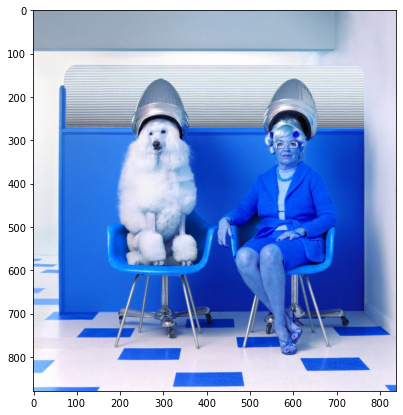

In [24]:
# load dependencies
from matplotlib import pyplot as plt
%matplotlib inline

# for resizing our inline images
import pylab
pylab.rcParams['figure.figsize'] = (8, 7)

# displaying the image
plt.imshow(img)
plt.xticks([]), plt.yticks([]) # to hide ticks and values
plt.show()

Notice the blue tint of the image above. It's displayed like this because openCV reads images in the format of BGR, whereas matplotlib shows them in RGB.

### Splitting and merging channels

The B,G,R channels of an image can be split into their individual planes when needed. Then, the individual channels can be merged back together.

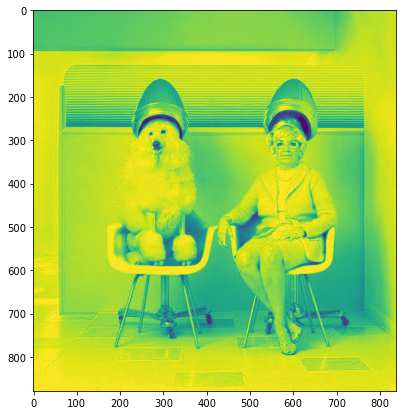

In [32]:
# splitting color channels
b,g,r = cv2.split(img)

# display single channel
plt.imshow(r)

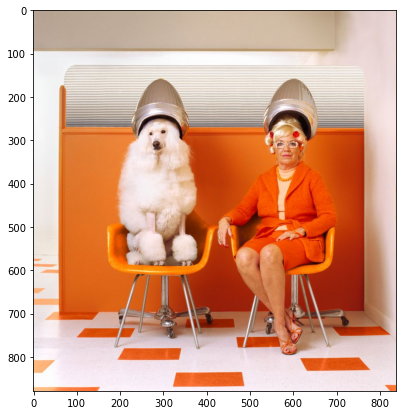

In [26]:
# merging
merged_image = cv2.merge([r,g,b])

plt.imshow(merged_image)

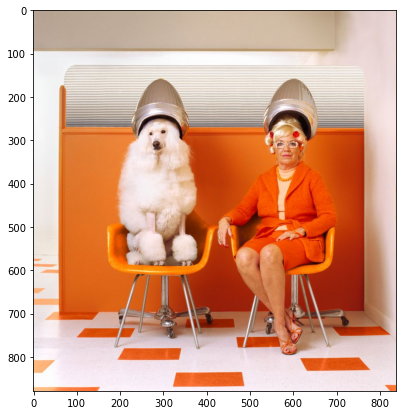

In [27]:
# using the cvtColor() function to change color space
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)

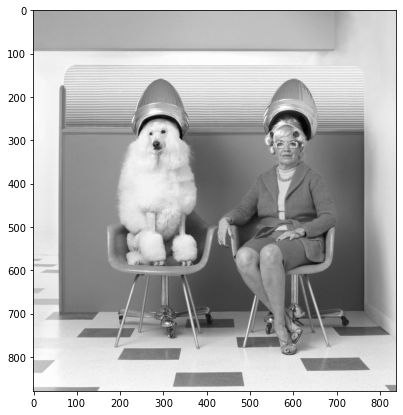

In [33]:
# using the cvtColor() function to change color space
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')  

### Accessing and Modifying pixel values

In [34]:
# any pixel can be accessed by calling [row, column]
pixel = rgb_img[700,150]
print(pixel)

[232 157 126]


In [35]:
# reversely, you can set a pixel to a desired value
rgb_img[400,100] = (0,0,0)
print(rgb_img[400,100])

[0 0 0]


### Increasing Brightness

In [36]:
# read as grayscale image 
img = cv2.imread(path, 0)

# look at a sample pixel
pixel = img[20,20]
print(pixel)

167


In [ ]:
for k in range(0,20):
    # [:,:] stands for everything
    img[:,:] = np.where(img[:,:]* 1.03 < 255, (img[:,:] * 1.03).astype(np.uint8) , img[:,:])

plt.imshow(img, cmap='gray')

### Decreasing Brightness

In [ ]:
# read the image
img = cv2.imread(path, 0)

for k in range(0,50):
    # [:,:] stands for everything
    img[:,:] = (img[:,:] * 0.97).astype(np.uint8)

plt.imshow(img, cmap='gray')

### Image ROI

ROI = Region of interest

In [ ]:
# read image
img = cv2.imread(path)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# change multiple pixels using numpy indexing
# [top y: bottom y, left x: right x]

rgb_img[50:100, 50:100] = [0,0,0]
plt.imshow(rgb_img)

In [ ]:
# move multiple pixels
head1 = rgb_img[150:350, 220:370]
rgb_img[150:350, 510:660] = head1

plt.imshow(rgb_img)